<h1>Problem3</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import *

random.seed(0)
np.random.seed(0)

In [2]:
data = pd.read_csv('data.txt',delim_whitespace = True,header = None)

In [3]:
data

,0,1
0,-6.0,-164.160590
1,-5.8,90.739607
2,-5.6,-131.842090
3,-5.4,-178.428200
4,-5.2,-4.838565
...,...,...
76,9.2,1798.230000
77,9.4,2025.194400
78,9.6,2055.884500
79,9.8,2340.809100


In [4]:
x,y = data[0],data[1]

<h3>1.Partition data into 10 sets</h3>

In [5]:
x_train=[]
x_test=[]
y_train=[]
y_test=[]
for i in range(0,10):
    x_tr,x_tst,y_tr,y_tst = train_test_split(x,y,test_size=0.2)
    x_train.append(x_tr)
    x_test.append(x_tst)
    y_train.append(y_tr)
    y_test.append(y_tst)

In [6]:
for i in range(0,10):
    print(len(x_test[i]),len(x_train[i]),len(y_train[i]),len(y_test[i]))

17 64 64 17
17 64 64 17
17 64 64 17
17 64 64 17
17 64 64 17
17 64 64 17
17 64 64 17
17 64 64 17
17 64 64 17
17 64 64 17


In [7]:
data

,0,1
0,-6.0,-164.160590
1,-5.8,90.739607
2,-5.6,-131.842090
3,-5.4,-178.428200
4,-5.2,-4.838565
...,...,...
76,9.2,1798.230000
77,9.4,2025.194400
78,9.6,2055.884500
79,9.8,2340.809100


<b>Plot before normalization:</b>

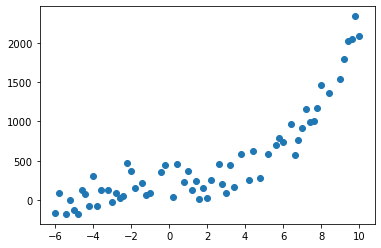

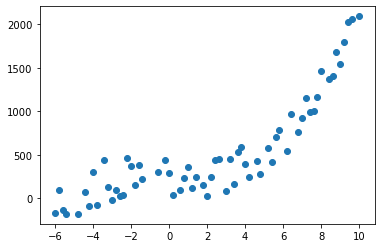

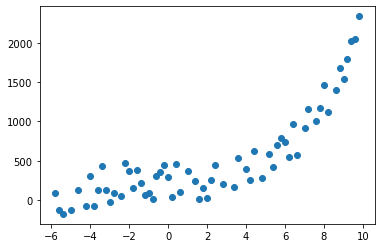

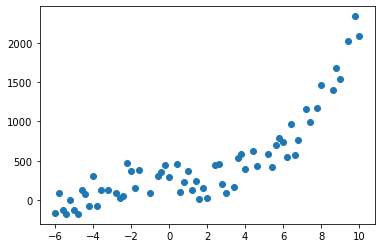

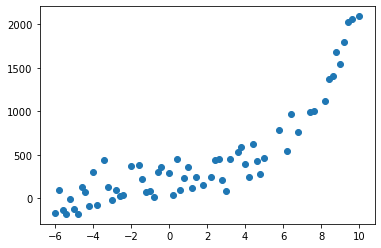

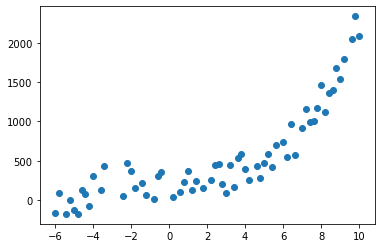

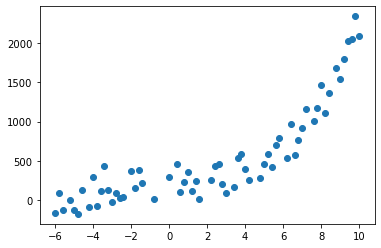

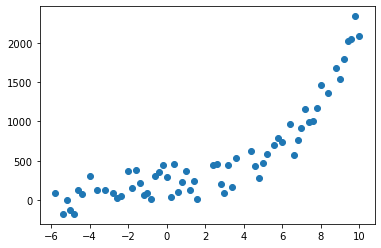

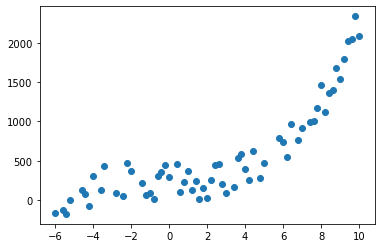

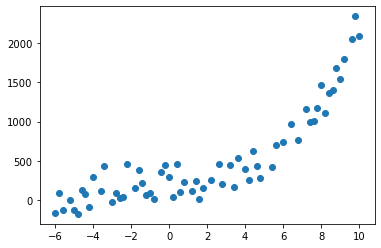

In [8]:

for i in range(0,10):
    fig,ax = plt.subplots();
    ax.scatter(x_train[i],y_train[i]);

In [9]:
#Find Mean for all sets

x_train_mean = []
y_train_mean = []
for i in range(0,10):
    x_train_mean.append(x_train[i].mean())
    y_train_mean.append(y_train[i].mean())
print(x_train_mean)
print(y_train_mean)

[1.821875, 2.171875, 2.003125, 1.5968749999999998, 1.471875, 2.4281250000000005, 2.175, 2.246875, 2.43125, 1.8687500000000001]
[506.10063661562504, 531.7846146875, 521.97671059375, 476.39260241249997, 465.06024256874997, 551.3631129124999, 542.580197771875, 557.103098771875, 569.813176553125, 519.8270516]


In [10]:
#Find Standard Deviation for all sets

x_train_std = []
y_train_std = []
for i in range(0,10):
    x_train_std.append(x_train[i].std())
    y_train_std.append(y_train[i].std())
print(x_train_std,y_train_std)

[4.828502306493135, 4.724386875479859, 4.656382162287567, 4.722857917062709, 4.761801338162585, 4.781427984549027, 4.901117462472449, 4.677367620483006, 4.671048113238664, 4.837448986647063] [614.2118569362291, 584.2583211867101, 586.7895440790115, 569.3262699875693, 575.7369254971815, 596.1523667179044, 622.4006076780136, 611.7814671952825, 619.078950623506, 607.3981540720353]


<h3>2.Normalize Training sets</h3>

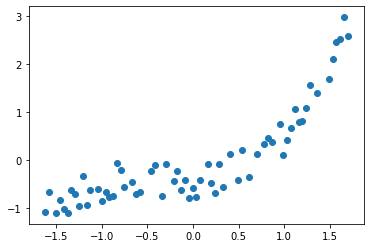

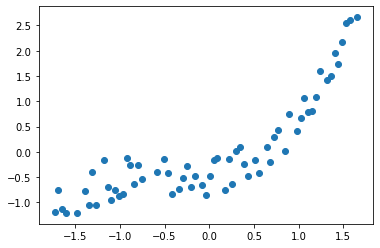

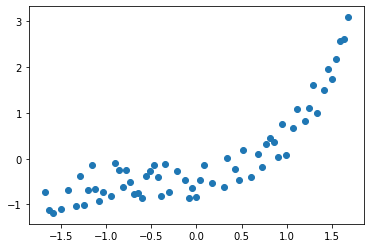

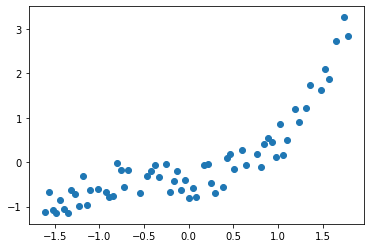

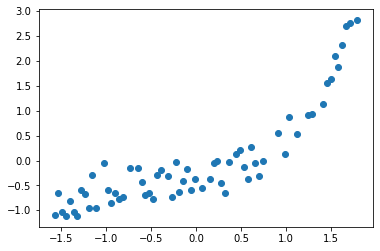

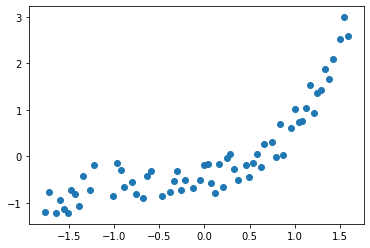

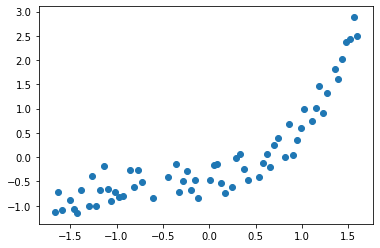

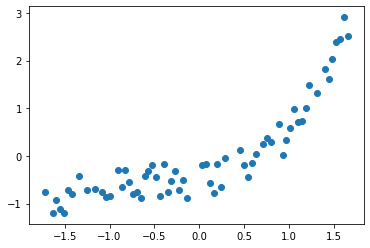

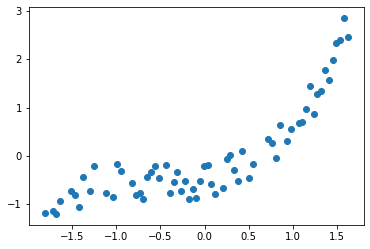

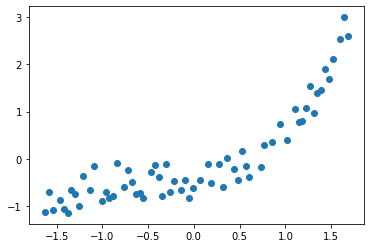

In [11]:
x_normal = {}
y_normal = {}
for i in range(0,10):
    xi_normal = []
    yi_normal = []
    for x in x_train[i]:
        xn = (x-x_train_mean[i])/x_train_std[i]
        xi_normal.append(xn)
    for y in y_train[i]:
        yn = (y-y_train_mean[i])/y_train_std[i]
        yi_normal.append(yn)
    x_normal[i] = xi_normal    
    y_normal[i] = yi_normal
    
for i in range(0,10):
  fig,ax = plt.subplots();
  ax.scatter(x_normal[i],y_normal[i])

<h3>3.Compute weights for 4 hypotheses</h3>

In [40]:
#required values for each Hypotheses
W = {}
meanETrain = {}
meanETest = {}
y_pred={}
y_pred_test = {}

                  

def predict(pwr):
    y_pred_i = []
    y_pred_test_i = []
    W_i = []
    meanETrain_i =[]
    meanETest_i = []
    
    for i in range(0,10):
        m = len(x_normal[i]) 
        X = np.array(x_normal[i]).reshape(m,1)
        Y = np.array(y_normal[i]).reshape(m,1)
        polyReg = make_pipeline(PolynomialFeatures(pwr,include_bias=False),LinearRegression())
        polyReg.fit(X,Y)
        theta = polyReg.steps[1][1].coef_
        theta = np.append(polyReg.steps[1][1].intercept_,theta)
        print("Set",i,"Polynomial of degree",pwr," weights:",theta)
        W[i] = theta
        dot_train=polyReg.predict(X)
        y_pred_i.append(dot_train)
        dot_test = polyReg.predict(np.array(x_test[i]).reshape(len(x_test[i]),1))
        y_pred_test_i.append(dot_test)
        meanETrain_i.append(mean_squared_error(Y, dot_train))
        meanETest_i.append(mean_squared_error(y_test[i],dot_test))
        
    y_pred[pwr] = y_pred_i
    y_pred_test[pwr] = y_pred_test_i
    W[pwr] = W_i
    meanETest[pwr] = meanETest_i
    meanETrain[pwr] = meanETrain_i
    return polyReg

    
#Hypothesis1
polyReg1 = predict(1)

#Hypothesis2
polyReg2 = predict(3)

#Hypothesis3
polyReg3  = predict(5)

#Hypothesis4
polyReg4 = predict(50)


Set 0 Polynomial of degree 1  weights: [-4.40412314e-17  8.47010347e-01]
Set 1 Polynomial of degree 1  weights: [-4.85722573e-17  8.44697646e-01]
Set 2 Polynomial of degree 1  weights: [-4.38387940e-17  8.31783605e-01]
Set 3 Polynomial of degree 1  weights: [9.08048309e-18 8.36420559e-01]
Set 4 Polynomial of degree 1  weights: [2.52897829e-17 8.55358176e-01]
Set 5 Polynomial of degree 1  weights: [2.48938496e-16 8.30697944e-01]
Set 6 Polynomial of degree 1  weights: [3.45034831e-17 8.39449786e-01]
Set 7 Polynomial of degree 1  weights: [1.27352369e-17 8.52298014e-01]
Set 8 Polynomial of degree 1  weights: [0.        0.8392176]
Set 9 Polynomial of degree 1  weights: [2.15911194e-17 8.51934706e-01]
Set 0 Polynomial of degree 3  weights: [-0.44829261  0.24640905  0.43355126  0.33105591]
Set 1 Polynomial of degree 3  weights: [-0.46032775  0.27778355  0.48593029  0.33588307]
Set 2 Polynomial of degree 3  weights: [-0.48762566  0.19233807  0.47047292  0.34947988]
Set 3 Polynomial of degree 

Here is an alternate method to compute weights using 'Gradient Descent'. But this method is incompatible for Hypothesis 4 since dot product of nx51 and 51x1 is not computationally possible due to the limitations of data objects to store such a large value. This method gives the same values for co efficients of x^n, but a slightly different intercept value. The graphs plotted with these values have the same shape as the ones using the previous method. However, going forward, I will be using the values obtained from sklearn's 'LinearRegression' library function.

In [43]:
def create_X_matrix(data,pol_pwr):
    m = len(data)
    X = np.ones((m,1))
    if(pol_pwr>=1):
        for i in range(1,pol_pwr+1):
            x_pow = data**i
            X= np.append(X,x_pow.reshape(m,1),axis=1)
    return X



def gradientDescent(X,y,theta,alpha,num_iters):
    """ 
    Take in numpy array X, y and theta and update theta by taking   num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each  iteration
    """
    max_pwr = len(theta)
    
    y = np.array(y, dtype=np.float64) 
    theta = np.array(theta, dtype=np.float64)
    alpha = np.array(alpha, dtype=np.float64)
    
    m=len(y)
    
    X = np.array(X, dtype=np.float64)
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions-y))#[[y1+y2+y3+...][x1y1+x2y2+x3y3+...]]
        descent=alpha * 1/m * error
        theta-=descent
    
    return theta

#weight matrix for each Hypotheses
W1 = []
W2 = []
W3 = []
W4 = []

meanE1Train = []
meanE1Test = []
meanE2Train = []
meanE2Test = []
meanE3Train = []
meanE3Test = []
meanE4Train = []
y_pred1=[]
y_pred2=[]
y_pred3=[]
y_pred4=[]

#For all sample, 4 Hypotheses
for i in range(0,10):
    k=len(x_normal[i]) 
    data_x=np.array(x_normal[i]).reshape(k,1)
    #y=data_n[:,1].reshape(m,1) 
    y = np.array(y_normal[i]).reshape(k,1)

#Hypothesis1
    theta1=np.zeros((2,1)) #create a 2x1 matrix with 0s
    X_mat = create_X_matrix(data_x,1) #create X matrix with 1st column as 1s and next columns of X^p
    theta1 = gradientDescent(X_mat,y,theta1,0.01,1500)
    y_pred_train = np.dot(X_mat,theta1) #w0+xw1
    y_pred1.append(y_pred_train)
    X_test = create_X_matrix(np.array(x_test[i]).reshape(len(x_test[i]),1),1)
    y_pred_test = np.dot(X_test,theta1)
    meanE1Train.append(mean_squared_error(y, y_pred_train))
    meanE1Test.append(mean_squared_error(y_test[i],y_pred_test))
    W1.append(theta1)
    
#Hypothesis2
    theta2 = np.zeros((4,1))
    X_mat = create_X_matrix(data_x,3)
    theta2 = gradientDescent(X_mat,y,theta2,0.01,1500)    
    y_pred_train = np.dot(X_mat,theta2)
    y_pred2.append(y_pred_train)
    X_test = create_X_matrix(np.array(x_test[i]).reshape(len(x_test[i]),1),3)
    y_pred_test = np.dot(X_test,theta2)
    meanE2Train.append(mean_squared_error(y, y_pred_train))
    meanE2Test.append(mean_squared_error(y_test[i],y_pred_test))
    W2.append(theta2)
    
#Hypothesis3
    theta3 = np.zeros((6,1))
    X_mat = create_X_matrix(data_x,5)
    theta3 = gradientDescent(X_mat,y,theta3,0.01,1500)
    y_pred_train = np.dot(X_mat,theta3)
    y_pred3.append(y_pred_train)
    X_test = create_X_matrix(np.array(x_test[i]).reshape(len(x_test[i]),1),5)
    y_pred_test = np.dot(X_test,theta3)
    meanE3Train.append(mean_squared_error(y, y_pred_train))
    meanE3Test.append(mean_squared_error(y_test[i],y_pred_test))
    W3.append(theta3)
    
    
#Print weight matrices
print("Weight Matrix Hypothesis 1:",W1)
print("Weight Matrix Hypothesis 2:",W2)
print("Weight Matrix Hypothesis 3:",W3)

Weight Matrix Hypothesis 1: [array([[-5.60055474e-17],
       [ 8.47010043e-01]]), array([[-5.57193180e-17],
       [ 8.44697342e-01]]), array([[-4.09047796e-17],
       [ 8.31783306e-01]]), array([[5.54070678e-17],
       [8.36420258e-01]]), array([[5.53745418e-17],
       [8.55357869e-01]]), array([[2.77746576e-16],
       [8.30697645e-01]]), array([[5.51555329e-17],
       [8.39449484e-01]]), array([[5.01074876e-17],
       [8.52297707e-01]]), array([[-1.58607936e-17],
       [ 8.39217298e-01]]), array([[5.54764568e-17],
       [8.51934400e-01]])]
Weight Matrix Hypothesis 2: [array([[-0.44243614],
       [ 0.22980943],
       [ 0.42869287],
       [ 0.33974227]]), array([[-0.45589388],
       [ 0.2691871 ],
       [ 0.48312953],
       [ 0.34000155]]), array([[-0.48206237],
       [ 0.19502074],
       [ 0.46660651],
       [ 0.34826458]]), array([[-0.38379624],
       [ 0.16703355],
       [ 0.3687652 ],
       [ 0.35962109]]), array([[-0.38189309],
       [ 0.19000088],
       [ 0

<h3>4. For different hypotheses:</h3>

In [45]:
print("Mean Train Error Hypthesis1:",np.average(meanETrain[1]))
print("Mean Test Error Hypthesis1:",np.average(meanETest[1]))
print("Mean Train Error Hypthesis2:",np.average(meanETrain[3]))
print("Mean Test Error Hypthesis2:",np.average(meanETest[3]))
print("Mean Train Error Hypthesis3:",np.average(meanETrain[5]))
print("Mean Test Error Hypthesis3:",np.average(meanETest[5]))
print("Mean Train Error Hypthesis4:",np.average(meanETrain[50]))
print("Mean Test Error Hypthesis4:",np.average(meanETest[50]))

print("Standard Deviation Hypthesis1:",np.std(meanETrain[1]))
print("Standard Deviation Hypthesis2:",np.std(meanETrain[3]))
print("Standard Deviation Hypthesis3:",np.std(meanETrain[5]))
print("Standard Deviation Hypthesis4:",np.std(meanETrain[50]))

Mean Train Error Hypthesis1: 0.28495023925678076
Mean Test Error Hypthesis1: 464977.6123633991
Mean Train Error Hypthesis2: 0.058746682075366784
Mean Test Error Hypthesis2: 343784.72006904555
Mean Train Error Hypthesis3: 0.057854476502574345
Mean Test Error Hypthesis3: 932669.7999383796
Mean Train Error Hypthesis4: 0.17922623340702107
Mean Test Error Hypthesis4: 6.228023966442808e+96
Standard Deviation Hypthesis1: 0.013736875758884713
Standard Deviation Hypthesis2: 0.004743916275669725
Standard Deviation Hypthesis3: 0.004680627064804572
Standard Deviation Hypthesis4: 0.1496188912471949


<h3>Plot Mean Train & Test Errors for each Hypothesis</h3>

Text(0, 0.5, 'Mean Error training error over 10 folds')

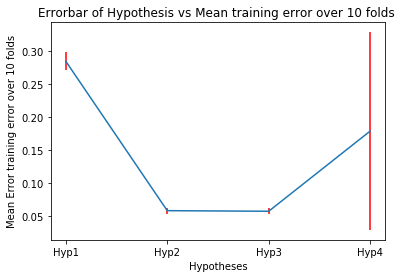

In [59]:
fig,ax = plt.subplots();
ax.errorbar(['Hyp1','Hyp2','Hyp3','Hyp4'],[np.average(meanETrain[1]),np.average(meanETrain[3]),np.average(meanETrain[5]),np.average(meanETrain[50])],[np.std(meanETrain[1]),np.std(meanETrain[3]),np.std(meanETrain[5]),np.std(meanETrain[50])],ecolor='red')
ax.set_title('Errorbar of Hypothesis vs Mean training error over 10 folds ')
ax.set_xlabel('Hypotheses')
ax.set_ylabel('Mean Error training error over 10 folds')

Text(0, 0.5, 'Mean Error training error over 10 folds')

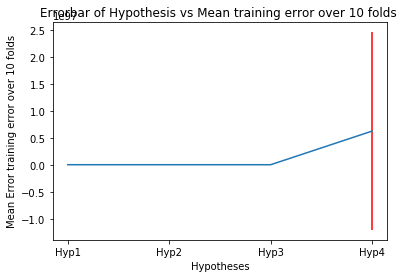

In [60]:
fig,ax = plt.subplots();
ax.errorbar(['Hyp1','Hyp2','Hyp3','Hyp4'],[np.average(meanETest[1]),np.average(meanETest[3]),np.average(meanETest[5]),np.average(meanETest[50])],[np.std(meanETest[1]),np.std(meanETest[3]),np.std(meanETest[5]),np.std(meanETest[50])],ecolor='red')
ax.set_title('Errorbar of Hypothesis vs Mean training error over 10 folds ')
ax.set_xlabel('Hypotheses')
ax.set_ylabel('Mean Error training error over 10 folds')

It seems that the S.D of mean errors for Hypothesis 4 is so large that +/- error lines for the other hypotheses are invisible in the graph

<h3>The set with the Minimum Training error for each Hypothesis</h3> 

In [61]:
print("Hypothesis 1: Index",meanETrain[1].index(min(meanETrain[1])))
print("Hypothesis 2: Index",meanETrain[3].index(min(meanETrain[3])))
print("Hypothesis 3: Index",meanETrain[5].index(min(meanETrain[5])))
print("Hypothesis 4: Index",meanETrain[50].index(min(meanETrain[50])))

Hypothesis 1: Index 4
Hypothesis 2: Index 7
Hypothesis 3: Index 7
Hypothesis 4: Index 8


<h4>Hypothesis 1:</h4>

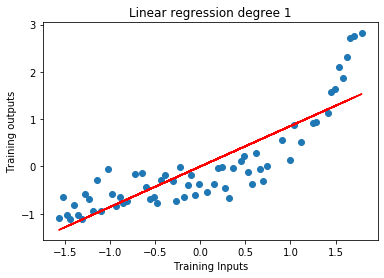

In [62]:
fig,ax = plt.subplots();
ax.scatter(x_normal[4],y_normal[4])
ax.set_xlabel('Training Inputs')
ax.set_ylabel('Training outputs')
ax.set_title('Linear regression degree 1')
ax.plot(x_normal[4],y_pred[1][4],color='r')

<h4>Hypothesis 2:</h4>

In [63]:
#Sort array
l = len(x_normal[7])
a = np.stack((np.array(x_normal[7]).reshape(l,1),np.array(y_normal[7]).reshape(l,1),y_pred[3][7].reshape(l,1)),axis=-1)
a=a.reshape(l,3)
a = a[a[:,0].argsort()]

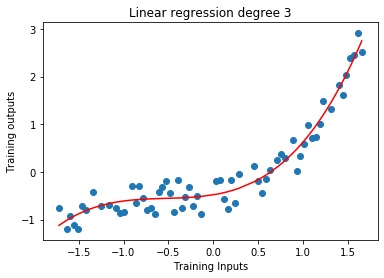

In [64]:
fig,ax = plt.subplots();
ax.scatter(a[:,0],a[:,1])
ax.set_xlabel('Training Inputs')
ax.set_ylabel('Training outputs')
ax.set_title('Linear regression degree 3')
ax.plot(a[:,0],a[:,2],color='r')

<h4>Hypothesis3</h4>

In [65]:
#sort array
l = len(x_normal[7])
a = np.stack((np.array(x_normal[7]).reshape(l,1),np.array(y_normal[7]).reshape(l,1),y_pred[5][7].reshape(l,1)),axis=-1)
a=a.reshape(l,3)
a = a[a[:,0].argsort()]

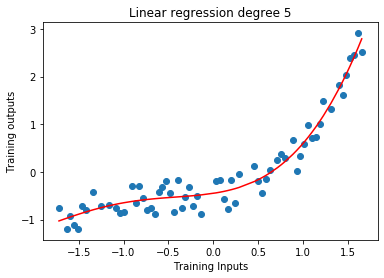

In [66]:
fig,ax = plt.subplots();
ax.scatter(a[:,0],a[:,1])
ax.set_xlabel('Training Inputs')
ax.set_ylabel('Training outputs')
ax.set_title('Linear regression degree 5')
ax.plot(a[:,0],a[:,2],color='r')

<h4>Hypothesis4</h4>

In [67]:
#sort array
l = len(x_normal[8])
a = np.stack((np.array(x_normal[8]).reshape(l,1),np.array(y_normal[8]).reshape(l,1),y_pred[50][8].reshape(l,1)),axis=-1)
a=a.reshape(l,3)
a = a[a[:,0].argsort()]

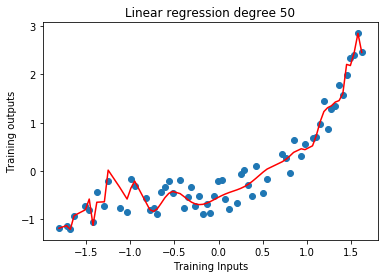

In [68]:
fig,ax = plt.subplots();
ax.scatter(a[:,0],a[:,1])
ax.set_xlabel('Training Inputs')
ax.set_ylabel('Training outputs')
ax.set_title('Linear regression degree 50')
ax.plot(a[:,0],a[:,2],color='r')

<h3>5.Conclusion</h3>

Hypothesis 1 - This model is too simple, it has high Mean Training Error and Mean Validation Error
Hypothesis 2 - This is a good model, it has low Mean Training Error and Mean Validtion Error
Hypothesis 3 - This is an average model, it has low Mean Training Error but has a high Mean Validation Error
Hypothesis 4 - This model is too comlplex. Even though it has a relatively low Mean Training Error, it has a very high Mean Validation Error. This is because of 'overfitting'. The model is memorizing the data points

<b>Thus I would choose Hypothesis 2</b>